In [184]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import pyedflib
from pyedflib import highlevel
import os
import h5py
import torch
import torchvision

In [185]:
#Constants 
dataPath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\files"
numChannels = 64
labels = {
    "T0" : "rest",
    "T1" : ["leftHand", "bothHands"],
    "T2" : ["rightHand", "bothFeet"]
}
labelsDict = {
    "rest": 0,
    "leftHand": 1,
    "rightHand": 2,
    "bothHands": 3,
    "bothFeet": 4
}
frequency = 160
time_period = 640
prc_overlap = .90
chunk_size = 1

(659,)
person 1 completed


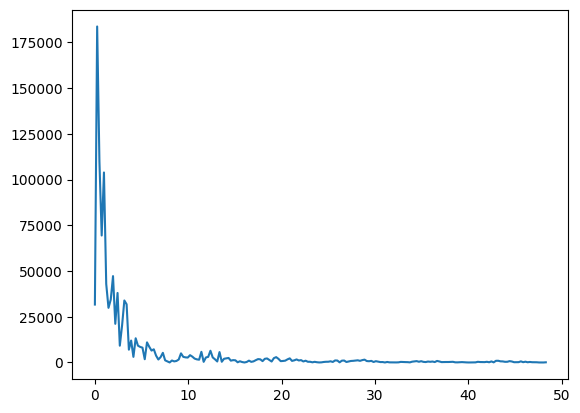

In [186]:
#Generating spectograms Images
person = 1
for folder in os.listdir(dataPath)[69:70]:
    for fileName in os.listdir(os.path.join(dataPath,folder)):

        #Skipping files .event files
        if fileName.find("event") != -1:
            continue

        #reading EDF file and extracting data
        filePath = os.path.join(dataPath,folder,fileName)
        annotations = ""
        file = ""

        #Getting the annotations and Data
        file = pyedflib.EdfReader(filePath)
        annotations = file.readAnnotations()
        file.close()

        signals, signal_headers, header = highlevel.read_edf(filePath)
        
        count = 0
        
        #Looping through the various 
        for i, period in enumerate(annotations[0]):
            #Getting signal data for 4 second period
            data = signals[:,int(annotations[0][i]):int(annotations[0][i]+time_period)]
            num = 30
            sample = data[num,:]

            sample = np.convolve(sample,np.ones(20))
            print(sample.shape)

            signal = np.fft.fft(sample)
            axis = np.fft.fftfreq(len(sample))*frequency

            signal = signal[0:int(len(signal)/2)]
            axis = axis[0:int(len(axis)/2)]
            signal = signal[0:200]
            axis = axis[0:200]

            
            plt.plot(axis,(signal.real**2 + signal.imag**2)**.5)
                
            # f, t, image = signal.spectrogram(data,frequency, nperseg = frequency, noverlap = frequency * prc_overlap)
            # image = np.transpose(image,(1,2,0))

            count += 1
        break
    print(f"person {person} completed")
    person +=1